# Read Me

Re-plotting profiles for QJ-RMS paper draft

# Imports

In [1]:
from traj_check import trajcheck
from traj_plot import traj_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from netCDF4 import date2index
from scipy import interpolate 
from netcdftime import utime
from datetime import datetime
import metpy.calc as mcalc
from metpy.units import units
from meteo import spec_humidity
from siphon.simplewebservice.igra2 import IGRAUpperAir
###################################
# importing my custom modules #
## Required for reading IGRA and SHEBA data
from station_plot import plot_station
from sounding_finder import sounding_finder
from sheba_df import sheba_df # To load sounding data at sheba
from sounding_df import sounding_df as sd


%matplotlib inline
# path to all trajectory files
path_traj= '/home/ollie/muali/Data/winter_all/'

##  Cloud data

In [2]:
## Cloud data
filename3_ = '/home/ollie/muali/Data/Cloud_data2/shbclouds.19971020.19981001.cdf'
ds_cloud2 = xr.open_dataset(filename3_)
# conversion from JDD to date-time
cdftime = utime('days since 1997-01-01 00:00:00')
t_file = cdftime.num2date(ds_cloud2.dtime) # for converting into time
# updating time
ds_cloud2.dtime.values = t_file # has 10 min time intervals

ds_cloud2['time'] = ds_cloud2.dtime

# filter bad values
ds_cloud2.lb_b.values[ds_cloud2.lb_b.values == -999] = np.nan
ds_cloud2.ht_e.values[ds_cloud2.ht_e.values == -999] =np.nan

In [65]:
ds_cloud2.dtime

<xarray.DataArray 'dtime' (time: 50112)>
array(['1997-10-21T00:00:00.000000000', '1997-10-21T00:10:01.171868000',
       '1997-10-21T00:19:59.707024000', ..., '1998-10-03T23:30:01.757805000',
       '1998-10-03T23:39:57.656243000', '1998-10-03T23:49:58.828118000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1997-10-21 ... 1998-10-03T23:49:58.828118
Attributes:
    long_name:  Day number, decimal
    comment:    Calculated from 1/1/1997
    interval:   10-minute

# Loading data for all the cloudy state cases 

In the increasing order of event dates

## $4^{th}$ Jan 23:00

In [3]:
# sheba df 4th Jan 23:00
df_she7 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_01_ascii/y1042316.she',
                   dropnan=True) # change directory to SHEBA files
she7 = sd(df_she7)

q_she7 = she7.spec_humidity()
rh_she7 = she7.relative_humidity()
rhi_she7 = she7.relative_humidity_ice()
#tpw_she7 = she7.tpw()
# throws up tuple indices error
pot_she7 = she7.potential_t()

### Station 'UKM00003026' ###
ukm3026_coords = [28.21, -6.317]
# 1st Jan 01:00 for 1850 and 31st Dec 20:00 for 2850 level
# on 31st Dec readings@ 5:00, 11, 17:00, 23:00
#df_ukm3026_1 = sounding_finder(file='UKM00003026', from_line='#UKM00003026 1997 12 31 17',\
#                           to_line='#UKM00003026 1997 12 31 23', to_print=1)
# no temperature readings on 31st Dec 17:00 sounding
df_ukm3026 = sounding_finder(file='UKM00003026', from_line='#UKM00003026 1997 12 31 23',\
                           to_line='#UKM00003026 1998 01 01', to_df=1)
ukm3026 = sd(df_ukm3026)
q_ukm3026 = ukm3026.spec_humidity()
rh_ukm3026 = ukm3026.relative_humidity()
rhi_ukm3026 = ukm3026.relative_humidity_ice()
pot_ukm3026 = ukm3026.potential_t()

### Station 'JNM00001001' ###
jnm1001_coords=[70.94, -8.67]
#1998-01-01 21:00:00 JNM00001001 for 1850m
# 2 readings at 00 and 12:00
df_jnm1001 = sounding_finder(file='JNM00001001', from_line='#JNM00001001 1998 01 02',\
                           to_line='#JNM00001001 1998 01 02 12', to_df=1)
jnm1001 = sd(df_jnm1001)
q_jnm1001 = jnm1001.spec_humidity()
rh_jnm1001 = jnm1001.relative_humidity()
rhi_jnm1001 = jnm1001.relative_humidity_ice()
pot_jnm1001 = jnm1001.potential_t()


### Station 'GLM00004320' ##
glm4320_coords=[76.77, -18.668]
# 1998-01-02 09:00:00
# 2 readings at 11:00 and 23:00
df_glm4320 = sounding_finder(file='GLM00004320', from_line='#GLM00004320 1998 01 02',\
                           to_line='#GLM00004320 1998 01 02 23', to_df=1)

glm4320 = sd(df_glm4320)
q_glm4320 = glm4320.spec_humidity()
rh_glm4320 = glm4320.relative_humidity()
rhi_glm4320 = glm4320.relative_humidity_ice()
pot_glm4320 = glm4320.potential_t()

# Coordinates of stations used
station_coords_list= [ukm3026_coords, jnm1001_coords, glm4320_coords]

### Cloud height

In [4]:
highest_04_01 = ds_cloud2.ht_e.sel(time=slice('1998-01-04 23:00', '1998-01-04 23:30')).mean().data
lowest_04_01 =  ds_cloud2.lb_b.sel(time=slice('1998-01-04 23:00', '1998-01-04 23:30')).mean().data

print(f'Lowest cloud base is {lowest_04_01:.3f}km and highest is {highest_04_01:.3f}km')

Lowest cloud base is 0.321km and highest is 1.117km


In [5]:
# obtained from radiosonde at SHEBA
highest_04_01_p = 865.3  # hPa
lowest_04_01_p = 970.3 # hPa

## $10^{th}$ Jan 23:00

In [6]:
# sounding at SHEBA site
df5_sheba = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_01_ascii/y1102340.she')
she5 = sd(df5_sheba)

q_she5 =  she5.spec_humidity()
rh_she5 =she5.relative_humidity()
rhi_she5 = she5.relative_humidity_ice()
pot_she5 = she5.potential_t()

### RSM00023022  ####
rsm23022_coords = [69.78, 61.78]
#1998-01-06 15:00:00
# has 2 readings daily
# For 780 and 1000m
df_rsm23022 = sounding_finder(file='RSM00023022', from_line='#RSM00023022 1998 01 06 12',\
                           to_line='#RSM00023022 1998 01 07', to_df=1)
rsm23022 = sd(df_rsm23022)
q23022 = rsm23022.spec_humidity()
rh23022 = rsm23022.relative_humidity()
rhi23022 = rsm23022.relative_humidity_ice()
pot23022 = rsm23022.potential_t()

### RSM00023205####
rsm23205_coords = [67.625, 53.017]
# -95.2hour 1998-01-07 00:00:00 RSM00023205
# this station has 2 readings per day
df_23205 = sounding_finder(file='RSM00023205', from_line='#RSM00023205 1998 01 07',\
                           to_line='#RSM00023205 1998 01 07 12', to_df=1)
rsm23205 = sd(df_23205)
q23205 = rsm23205.spec_humidity()
rh23205 = rsm23205.relative_humidity()
rhi23205 = rsm23205.relative_humidity_ice()
pot23205 = rsm23205.potential_t()
#tpw23205 = rsm23205.tpw(top=500 *units.hectopascal)
pot23205 = mcalc.potential_temperature(rsm23205.p *units.hectopascal, rsm23205.T *units.kelvin) # kelvin


## RSM00022271 ##
rsm22271_coords = [67.87, 44.17]
df_rsm22271_07 = sounding_finder(file='RSM00022271', from_line='#RSM00022271 1998 01 07 12',\
                           to_line='#RSM00022271 1998 01 08', to_df=1)
rsm22271_07 = sd(df_rsm22271_07)
q22271_07 = rsm22271_07.spec_humidity()
rh22271_07 = rsm22271_07.relative_humidity()

rhi22271_07 = rsm22271_07.relative_humidity_ice()
pot22271_07 = rsm22271_07.potential_t()
#tpw22271_07 = rsm22271_07.tpw(top=500 *units.hectopascal)



## NY-Alesund from PANGEA ###
alesund_coords=[78.92, 11.92]
rows = [x for x in range(0,25)]
file_ = '/home/ollie/muali/Data/alesund/NYA_UAS_1998.txt'
df_alesund = pd.read_csv(file_, sep='\t', skiprows=rows, index_col=0)
df_alesund.index = pd.to_datetime(df_alesund.index)
a = datetime(1998,10,8)
# 8th Jan 1998
df_ale8 = df_alesund.loc[(df_alesund.index.month==a.month) & (df_alesund.index.day==a.day),:].copy()


T_ale8 = df_ale8['TTT [°C]'].values + 273.15 # Kelvin

mr_8 = mcalc.mixing_ratio_from_relative_humidity(df_ale8['RH [%]'].values * units.percent, \
                                                 df_ale8['TTT [°C]'].values *units.celsius ,\
                                                 df_ale8['PPPP [hPa]'].values *units.hectopascal )

q_ale8 = mcalc.specific_humidity_from_mixing_ratio(mr_8) * 1000

/home/ollie/muali/python_notebook_ollie/sounding_df.py:72: RuntimeWarning: invalid value encountered in greater
  self.RH_w [self.RH_w > 120.] = 120 # assign RH = 100 for supersaturated values.


In [7]:
for st in [rsm22271_coords, rsm23022_coords, rsm23205_coords, alesund_coords]:
    station_coords_list.append(st)

In [8]:
highest_10_01 = ds_cloud2.ht_e.sel(time=slice('1998-01-10 23:30', '1998-01-11 00:00')).mean().data
lowest_10_01 =  ds_cloud2.lb_b.sel(time=slice('1998-01-10 23:30', '1998-01-11 00:00')).mean().data

print(f'Lowest cloud base is {lowest_10_01:.3f}km and highest is {highest_10_01:.3f}km')

Lowest cloud base is 0.114km and highest is 4.905km


In [9]:
highest_10_01_p = 533.9
lowest_10_01_p = 1021.8

## $28^{th}$ Jan 11:00

In [10]:
# sheba df 28th Jan 11:00
df_she_28_11 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_01_ascii/y1281114.she', dropnan=True)
she28_11 = sd(df_she_28_11)

q_she28_11 = she28_11.spec_humidity()
rh_she28_11 = she28_11.relative_humidity()
rhi_she28_11 = she28_11.relative_humidity_ice()
#tpw_she28_11 = she28_11.tpw()
#pot_she28_11 = she28_11.potential_t()


### CAM00071043 ####
cam71043_coords=[65.283, -126.75]

df_cam71043_27_12 = sounding_finder(file='CAM00071043', from_line='#CAM00071043 1998 01 27 12',\
                           to_line='#CAM00071043 1998 01 28', to_df=1)


cam71043_27_12 = sd(df_cam71043_27_12)

q_cam71043_27_12 = cam71043_27_12.spec_humidity()
rh_cam71043_27_12 = cam71043_27_12.relative_humidity()
rhi_cam71043_27_12 = cam71043_27_12.relative_humidity_ice()
pot_cam71043_27_12 = cam71043_27_12.potential_t()

### CAM00071957 ###
cam71957_coords = [ 68.316, -133.516]
df_cam71957_28_00 = sounding_finder(file='CAM00071957', from_line='#CAM00071957 1998 01 28 00',\
                           to_line='#CAM00071957 1998 01 28 12', to_df=1)


cam71957_28_00 = sd(df_cam71957_28_00)
q_cam71957_28_00 = cam71957_28_00.spec_humidity()
rh_cam71957_28_00 = cam71957_28_00.relative_humidity()
rhi_cam71957_28_00 = cam71957_28_00.relative_humidity_ice()
pot_cam71957_28_00 = cam71957_28_00.potential_t()


In [11]:
highest_28_01 = ds_cloud2.ht_e.sel(time=slice('1998-01-28 11:00', '1998-01-28 11:30')).mean().data
lowest_28_01 =  ds_cloud2.lb_b.sel(time=slice('1998-01-28 11:00', '1998-01-28 11:30')).mean().data

print(f'Lowest cloud base is {lowest_28_01:.3f}km and highest is {highest_28_01:.3f}km')

Lowest cloud base is 0.546km and highest is 8.385km


In [12]:
highest_28_01_p = 312
lowest_28_01_p = 938.6

In [13]:
ds_cloud2.lb_b.sel(time=slice('1998-01-28 11:00', '1998-01-28 11:30')).mean().data

array(0.54550004, dtype=float32)

## $27^{th}$ Feb 11:00

In [14]:
## SHEBA sounding ##

df_she_27_11 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_02_ascii/y2271110.she', dropnan=True)
she27_11= sd(df_she_27_11)

q_she27_11 = she27_11.spec_humidity()
rh_she27_11 = she27_11.relative_humidity()



#### USM00070361 ####
usm_70361_coords = [59.516, -139.666]
# 24-02-1998 16:00 USM00070361 59.516 -139.66
# 2 soundings per day
df_USM00070361_24_12 = sounding_finder(file='USM00070361', from_line='#USM00070361 1998 01 24 12',\
                           to_line='#USM00070361 1998 01 25', to_df=1)

usm_24_12 = sd(df_USM00070361_24_12)
q_usm_24_12 = usm_24_12.spec_humidity()
rh_usm_24_12 = usm_24_12.relative_humidity()


#####  CAM00071964 ####
cam71964_coords = [60.732, -135.096]
# 60.732 -135.096
df_CAM00071964_25 = sounding_finder(file='CAM00071964', from_line='#CAM00071964 1998 01 25 00',\
                           to_line='#CAM00071964 1998 01 25 12', to_df=1)

cam71964_25 = sd(df_CAM00071964_25)
q_cam71964_25 = cam71964_25.spec_humidity()
rh_cam71964_25 = cam71964_25.relative_humidity()


### CAM00071957   #####

df_CAM00071957_26 = sounding_finder(file='CAM00071957', from_line='#CAM00071957 1998 01 26 00',\
                           to_line='#CAM00071957 1998 01 26 12', to_df=1)

cam71957_26 = sd(df_CAM00071957_26)
q_cam71957_26 = cam71957_26.spec_humidity()
rh_cam71957_26 = cam71957_26.relative_humidity()

In [15]:
#updating station list
for st in [cam71043_coords, cam71957_coords, cam71964_coords, usm_70361_coords]:
    station_coords_list.append(st)

In [16]:
highest_27_02 = ds_cloud2.ht_e.sel(time=slice('1998-02-27 11:00', '1998-02-27 11:30')).mean().data
lowest_27_02 =  ds_cloud2.lb_b.sel(time=slice('1998-02-27 11:00', '1998-02-27 11:30')).mean().data

print(f'Lowest cloud base is {lowest_27_02:.3f}km and highest is {highest_27_02:.3f}km')

Lowest cloud base is 0.090km and highest is 6.529km


In [17]:
highest_27_02_p = 407.
lowest_27_02_p = 1000.

# Plot all profiles

In [18]:
# sns.palplot(sns.color_palette('muted'))

## Pressure plot

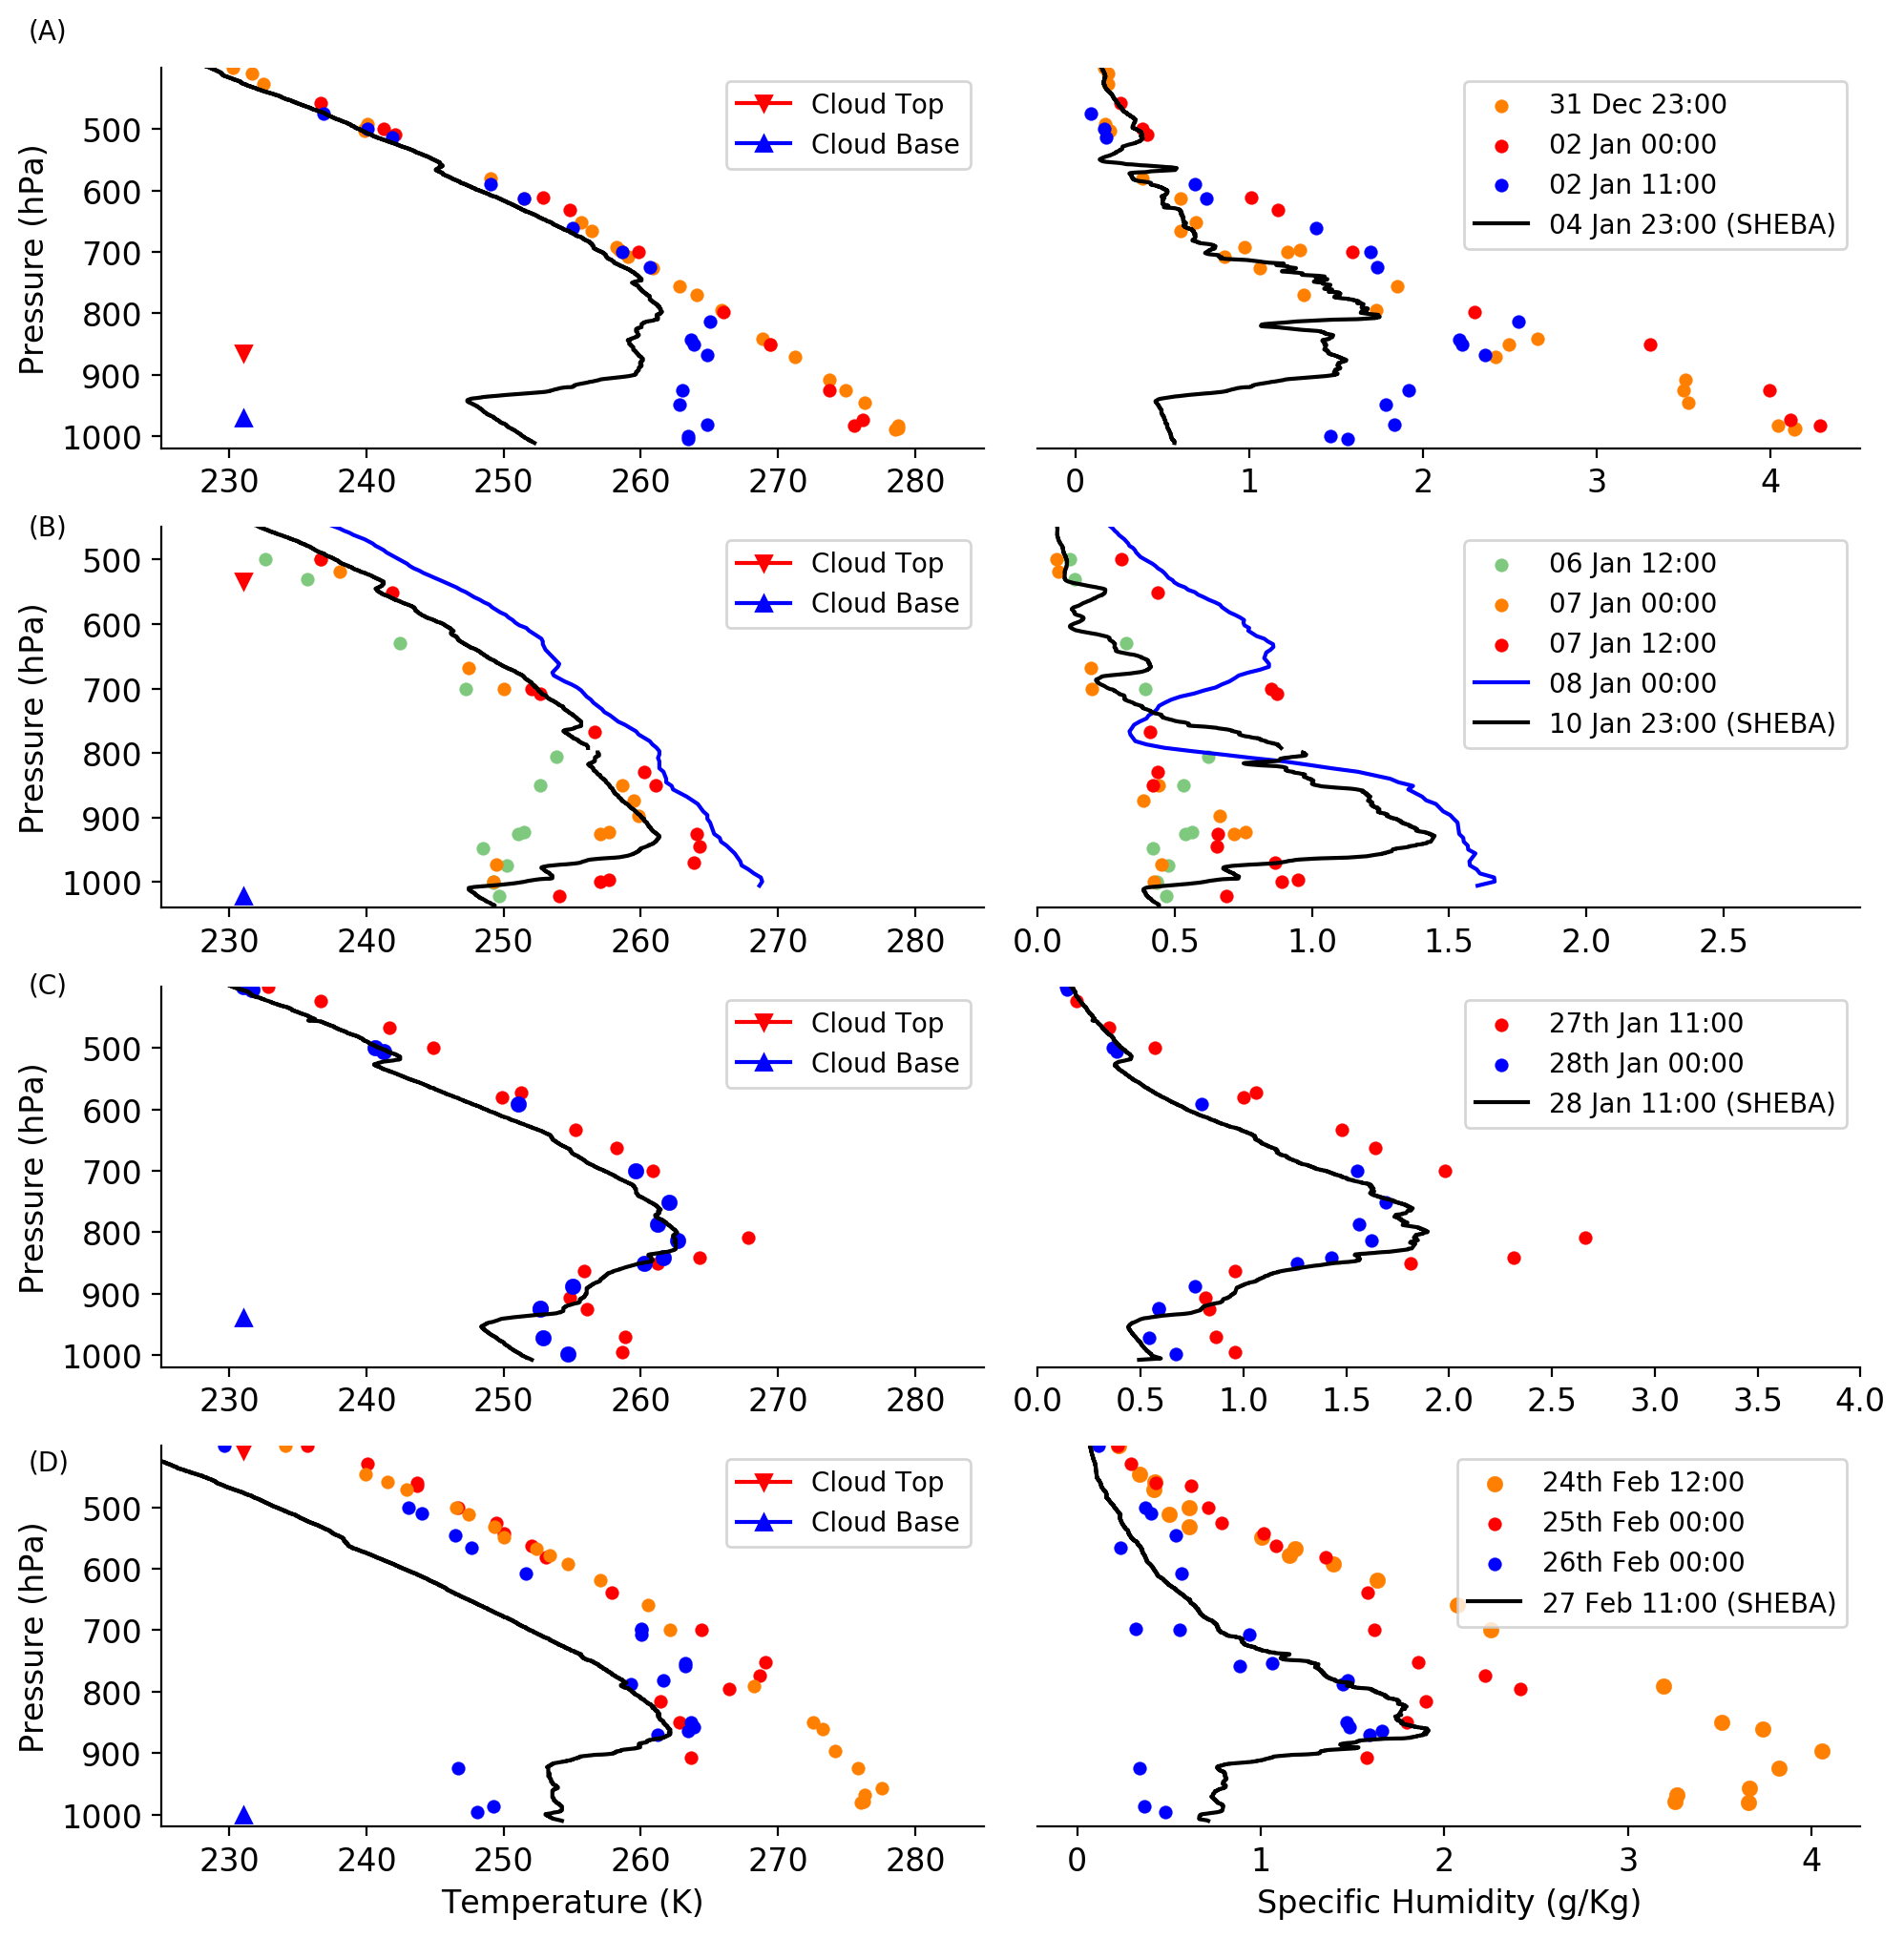

In [20]:
# joint plot
fig, axes = plt.subplots(4,2, figsize=(10,10), dpi=200)
dict_ax = {}
for i, ax in enumerate(axes.flatten()):
    dict_ax[f"ax{i}"] = ax

# dict_ax['ax0'] = plt.subplot(4,2,1)


dict_ax['ax0'].scatter(ukm3026.T, ukm3026.p,s =25, c='#ff7f00', linewidths=0.1)

dict_ax['ax0'].scatter(jnm1001.T, jnm1001.p,s =25, c='r', linewidths=0.1)
dict_ax['ax0'].scatter(glm4320.T, glm4320.p,s =25, c='b', linewidths=0.1)
dict_ax['ax0'].plot(she7.T, she7.p, c='k')

dict_ax['ax0'].set_ylabel('Pressure (hPa)', fontsize=12)

# Plotting clouds
dict_ax['ax0'].plot([231], highest_04_01_p, marker='v', label = 'Cloud Top', c='r')
dict_ax['ax0'].plot([231], lowest_04_01_p, marker='^', label = 'Cloud Base', c='b')

dict_ax['ax0'].legend() 

dict_ax['ax1'].scatter(q_ukm3026, ukm3026.p, s=25, c='#ff7f00', linewidths=0.1, label='31 Dec 23:00')

dict_ax['ax1'].scatter(q_jnm1001, jnm1001.p,s =25, c='r', linewidths=0.1, label='02 Jan 00:00')
dict_ax['ax1'].scatter(q_glm4320, glm4320.p,s =25, c='b', linewidths=0.1, label='02 Jan 11:00')
dict_ax['ax1'].plot(q_she7, she7.p, 'k', label='04 Jan 23:00 (SHEBA)' )


#ordering labels
handles, labels = dict_ax['ax1'].get_legend_handles_labels()
order = [1,2,3,0]
dict_ax['ax1'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

################################################################33

dict_ax['ax2'].scatter(rsm23022.T, rsm23022.p,s =25, c='#7fc97f', linewidths=0.1)
dict_ax['ax2'].scatter(rsm23205.T, rsm23205.p,s =25, c='#ff7f00', linewidths=0.1)
dict_ax['ax2'].scatter(rsm22271_07.T, rsm22271_07.p,s =25, c='r', linewidths=0.1)
dict_ax['ax2'].plot(T_ale8, df_ale8['PPPP [hPa]'].values, c='b')
dict_ax['ax2'].plot(she5.T, she5.p, c='k')

dict_ax['ax2'].plot([231], highest_10_01_p, marker='v', label = 'Cloud Top', c='r')
dict_ax['ax2'].plot([231], lowest_10_01_p, marker='^', label = 'Cloud Base', c='b')

dict_ax['ax2'].legend()

dict_ax['ax3'].scatter(q23022, rsm23022.p, s=25, c='#7fc97f', linewidths=0.1, label='06 Jan 12:00')
dict_ax['ax3'].scatter(q23205, rsm23205.p,s =25, c='#ff7f00', linewidths=0.1, label='07 Jan 00:00')
dict_ax['ax3'].scatter(q22271_07, rsm22271_07.p,s =25, c='r', linewidths=0.1, label='07 Jan 12:00')
dict_ax['ax3'].plot(q_ale8, df_ale8['PPPP [hPa]'].values , c='b', label='08 Jan 00:00')
dict_ax['ax3'].plot(q_she5, she5.p, 'k', label='10 Jan 23:00 (SHEBA)' )

dict_ax['ax3'].set_xlabel('')

# setting legend

handles, labels =dict_ax['ax3'].get_legend_handles_labels()
order = [2,3,4,0,1]
dict_ax['ax3'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

##################################################################################################################


dict_ax['ax4'].scatter(cam71043_27_12.T, cam71043_27_12.p,s =25, c='r', linewidths=0.1) # use linewidth for smaller dots
dict_ax['ax4'].scatter(cam71957_28_00.T, cam71957_28_00.p, c='b', linewidths=0.1)
dict_ax['ax4'].plot(she28_11.T, she28_11.p , c='k')

dict_ax['ax4'].plot([231], highest_28_01_p, marker='v', label = 'Cloud Top', c='r')
dict_ax['ax4'].plot([231], lowest_28_01_p, marker='^', label = 'Cloud Base', c='b')


dict_ax['ax4'].legend()

dict_ax['ax5'].scatter(q_cam71043_27_12, cam71043_27_12.p,s =25, c='r', linewidths=0.1, label='27th Jan 11:00')
dict_ax['ax5'].scatter(q_cam71957_28_00, cam71957_28_00.p,s =25, c='b', linewidths=0.1, label='28th Jan 00:00')
dict_ax['ax5'].plot(q_she28_11, she28_11.p, c='k', label='28 Jan 11:00 (SHEBA)' )
dict_ax['ax5'].invert_yaxis()
dict_ax['ax5'].set(ylim=[1030,450], xlim=(0,4), yticks=[], yticklabels=[])
dict_ax['ax5'].tick_params(labelsize=12)

handles, labels = dict_ax['ax5'].get_legend_handles_labels()
order = [1,2,0]
dict_ax['ax5'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

#############################################################################################

dict_ax['ax6'].scatter(cam71964_25.T, cam71964_25.p, s=25, c='r', linewidths=0.1) # use linewidth for smaller dots
dict_ax['ax6'].scatter(cam71957_26.T, cam71957_26.p, s=25, c='b',linewidths=0.1)
dict_ax['ax6'].scatter(usm_24_12.T, usm_24_12.p, s=25, linewidths=0.1, c='#ff7f00')
dict_ax['ax6'].plot(she27_11.T, she27_11.p, c='k')

dict_ax['ax6'].plot([231], highest_27_02_p, marker='v', label = 'Cloud Top', c='r')
dict_ax['ax6'].plot([231], lowest_27_02_p, marker='^', label = 'Cloud Base', c='b')
dict_ax['ax6'].legend()

dict_ax['ax7'].scatter(q_usm_24_12, usm_24_12.p, linewidths=0.1, label='24th Feb 12:00', c='#ff7f00')
dict_ax['ax7'].scatter(q_cam71964_25, cam71964_25.p,s =25, c='r', linewidths=0.1, label='25th Feb 00:00')
dict_ax['ax7'].scatter(q_cam71957_26, cam71957_26.p,s =25, c='b', linewidths=0.1, label='26th Feb 00:00')
dict_ax['ax7'].plot(q_she27_11, she27_11.p, c='k', label='27 Feb 11:00 (SHEBA)' )

# setting legend
handles, labels = dict_ax['ax7'].get_legend_handles_labels()
order = [1,2,3,0]
dict_ax['ax7'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

###########################################################

for ax in list(dict_ax.values())[::2]:
    ax.tick_params(labelsize=12)
    ax.invert_yaxis()
    ax.set(ylim=[1020,400], xlim=[225,285], yticks=np.arange(1000, 400, -100), )
    ax.set_ylabel('Pressure (hPa)', fontsize=12)
    sns.despine(ax=ax)
                   
for ax in list(dict_ax.values())[1::2]:
    ax.tick_params(labelsize=12)
    ax.invert_yaxis()
    ax.set_ylim([1020,400])
    ax.set(yticks=[], yticklabels=[])
    sns.despine(ax=ax, left=True)
                   
dict_ax['ax6'].tick_params(labelsize=12)
dict_ax['ax6'].set_xlabel('Temperature (K)', fontsize=12)
dict_ax['ax6'].set_ylabel('Pressure (hPa)', fontsize=12)
dict_ax['ax7'].set_xlabel('Specific Humidity (g/Kg)', fontsize=12)

dict_ax['ax7'].tick_params(labelsize=12)
dict_ax['ax2'].set_ylim([1040,450]);
dict_ax['ax3'].set_ylim([1040,450]);
dict_ax['ax3'].set(xticks=np.arange(0,3, 0.5), xlim=[0,3]);

plt.figtext(x=0.02, y=1, s='(A)');
plt.figtext(x=0.02, y=0.74, s='(B)');
plt.figtext(x=0.02, y=0.5, s='(C)');
plt.figtext(x=0.02, y=0.25, s='(D)');
plt.tight_layout();
plt.savefig('/home/ollie/muali/plots_journal_v2/all_cloudy_profiles_v_22_11_2019.png', 
            dpi=300, bbox_inches='tight')

# All Cloudy Trajectories

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def traj_plot(*dates, path, path_save=None, plot_name='traj_plot', sea_ice='Yes', stations=None, station_coords=None,
              save_fig=None, figsize=(12,10), pixel=None, title=None ,skiprows=7, boundinglat=None, labels=[],
              colors=[],
              levels = ['400', '780', '1000', '1400', '1850', '2850', '3950', '5220', '6730', '8600']):
    
    """Function to plot trajectories for a variable dates for user specified levels with an option for sea_ice
    brackground on a single plot.
    
    Input arguments: 
    date: as a datetime.datetime object Eg, datetime(1997,12,1,23)
    path: path of data file to be plotted
    path2: path where the file is desired to be saved
    sea_ice: 'Yes' or 'Y' to plot sea_ice
    station_coords: (list), list of coordinates of stations to plot in the from of lat, lon
    save_fig: Default doesn't save
    figsize: controls figure size. To be given as tuple
    pixel: Alter dpi for resolution
    title: Heading of the plot
    skiprows: No of rows to skip while reading the trajectory data. Default 7 but depends on number of Meteo files used while traj 
    calculation
    boundinglat: (int) latitude limit for bounding lat, default 40 N
    labels: trajectory labels
    levels: Trajectory levels to plot as a list of strings
    Eg, levels = ['400', '780', '1000', '1400', '1850', '2850', '3950', '5220', '6730', '8600'] """
    
    # path
    
    date_str = ['{:%m_%d_%H}'.format(date) for date in dates]
    #print(date_str) 
    
    # creating a basemap
    fig = plt.figure(figsize=figsize, dpi=pixel)
        # plt.figure(figsize=(10,8))
        
        # creating projection
    if boundinglat is None:
        m = Basemap(projection='npstere',boundinglat=40,lon_0=270, #lat_0=90, 
            resolution='l')
    else:
        m = Basemap(projection='npstere',boundinglat=boundinglat,lon_0=270, #lat_0=90, 
            resolution='l')
        
    m.fillcontinents(color='0.75')
    ax =plt.gca()    
    
    
    m.drawcoastlines(color='0.75')
    #m.fillcontinents(color='0.75')
    #m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
    #m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
    
    if (sea_ice == 'Yes' or sea_ice == 'Y'):    
        # Reading Sea Ice data
        filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
        ds = Dataset(filename_)
        
        # to get the time index out of the netcdf variable
        # change it according to the month you want to plot
        # Eg, dec here
        # timeindex gives you the index of in the netcdf file
        
        timeindex = date2index(datetime(dates[0].year,dates[0].month,15),ds.variables['time'])
        lats_ice = ds.variables['latitude'][:]
        lons_ice = ds.variables['longitude'][:]
    
        #note that lon goes from 0 to 360
        # should we do a -180 here? No, basemap adjusts it automatically
        # creating our meshgrid according to data coordinates given

        lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
        # meshgrid creates a coordinate system with our axis supplied

        # getting seaice for SHEBA december as an eg but it works for all months
        sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
        # masking the low seaice concentration value
        # check low sea ice value by np.sea_ice_dec.mina
        # masking since min sea Ice is -1 for continents
        
        sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) # False condition is shown in the data
        ds.close()
        
        ## plotting Sea Ice ##
        m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='plasma')
        plt.clim(0, 100) # Set the color limits of the current image
#         plt.colorbar(label='Sea Ice Concentration',fraction=0.046, pad=0.04)
        plt.colorbar(label='Sea Ice Concentration', shrink=0.65)

    
    
    all_dates = "" # to print dates in the title
    
    #
    ## To do: Pass labels in the function call
    
    
    #### plotting trajectories #####
    
    for i, d_ in enumerate(date_str):
       # print("\n", d_)
        for lvl in levels:
            df = pd.read_csv(path+'tdump_'+lvl+'_'+d_, skiprows=skiprows, header=None, delim_whitespace=True)
        
        #taking lat lons of the trajectories to be plotted
            lat = np.array(df.iloc[:, 9].copy())
            lon = np.array(df.iloc[:, 10].copy())
    
        #Convert lat lon to map coordinates
            x, y = m(lon, lat)
    
        #Plot the points on the map
            plt.plot(x, y,linewidth=1.0, color=colors[i] )
            
            # labeling single traj to avoid cluttering
            if lvl is levels[-1]:
                plt.plot(x, y,linewidth=1.0, color=colors[i], label= labels[i])      
        #source point
            xpt, ypt = m(lon[-1], lat[-1])
           # plt.plot(xpt, ypt, marker = '*', markerfacecolor=colors[i], linewidth=0, markersize=5)
            # Text
            plt.text(xpt,ypt,lvl, fontsize=8, color=colors[i])
            # plt.text(xpt,ypt,'Source (%5.1fW,%3.1fN)' % (lonpt,latpt), color='yellow', fontsize=15)
        

    if station_coords is not None:
        np_station_coords = np.array(station_coords)
        st_x, st_y = m(np_station_coords[:,1], np_station_coords[:,0]) # lon, lat
        plt.scatter(st_x, st_y, marker = '*', c='#ff7f00', s=120, edgecolors='k', linewidths=0.7, zorder=10,
                   label='Stations')
    
    plt.legend(loc='upper right')


    for date in dates:
        all_dates +='{}'.format(date)+" "
        
    if title is not None:
        plt.title(all_dates)
    if save_fig != None:
        # saving fig
        plt.savefig(path_save + plot_name + '.png', dpi=300, bbox_inches='tight' )
        plt.close(fig)
    else:
        plt.show(fig)

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


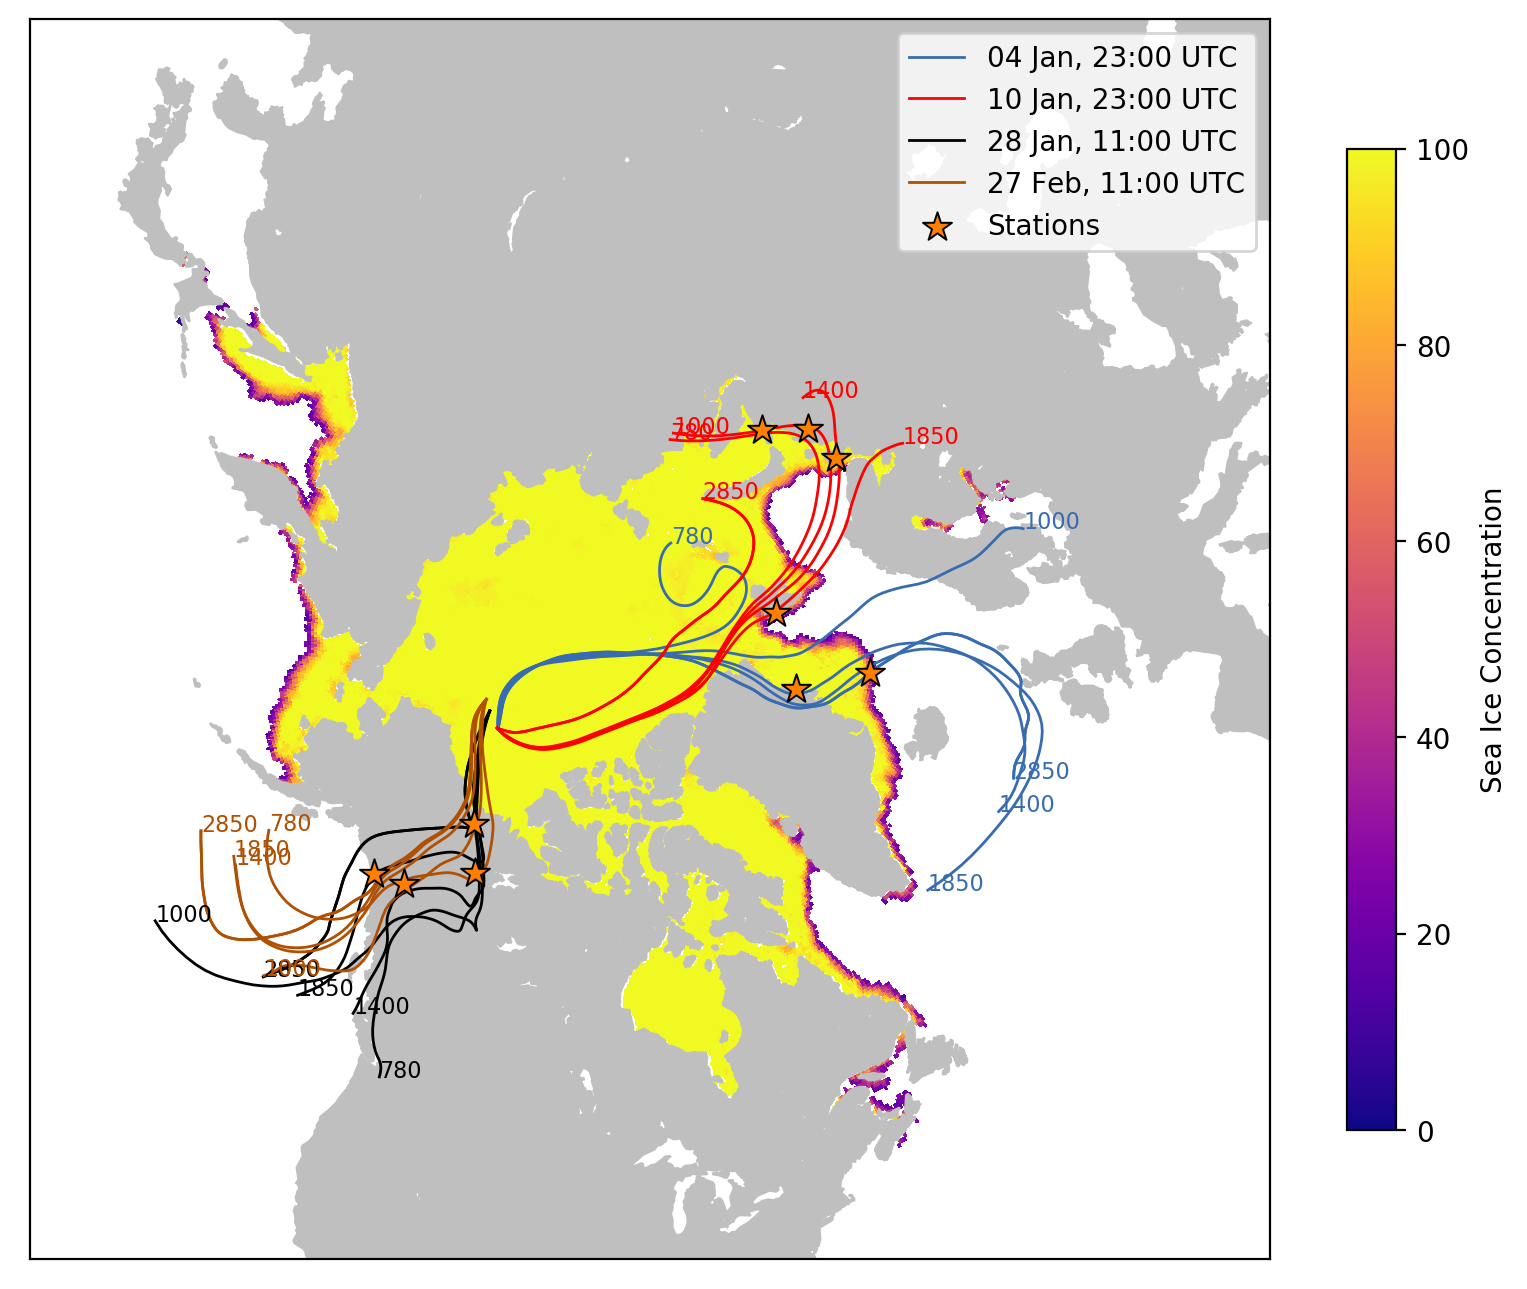

In [20]:
labels = ['04 Jan, 23:00 UTC', '10 Jan, 23:00 UTC', '28 Jan, 11:00 UTC', '27 Feb, 11:00 UTC']
colors = ['#386cb0', 'red', 'k', '#af5002'] 
path_save= '/home/ollie/muali/plots_journal_v2/'
plot_name='all_cloudy_traj_v_30_10_2019_v2'
traj_plot(datetime(1998,1,4,23), datetime(1998,1,10,23), datetime(1998,1,28,11) ,datetime(1998,2,27,11),\
          path=path_traj, figsize=(10,10), pixel=200, station_coords=station_coords_list, labels=labels, 
          colors=colors,path_save=path_save, plot_name=plot_name, 
          levels=['780', '1000', '1400', '1850', '2850'])

## Saving plot

In [105]:
labels = ['04 Jan, 23:00 UTC', '10 Jan, 23:00 UTC', '28 Jan, 11:00 UTC', '27 Feb, 11:00 UTC']
colors = ['#386cb0', 'red', 'k', '#af5002'] 
path_save= '/home/ollie/muali/plots_journal_v2/'
plot_name='all_cloudy_traj_v_30_10_2019'
traj_plot(datetime(1998,1,4,23), datetime(1998,1,10,23), datetime(1998,1,28,11) ,datetime(1998,2,27,11),\
          path=path_traj, figsize=(10,10), pixel=200, station_coords=station_coords_list, labels=labels, 
          colors=colors, save_fig=1,path_save=path_save, plot_name=plot_name,
          levels=['780', '1000', '1400', '1850', '2850'])

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [62]:
station_coords_list

[[28.21, -6.317],
 [70.94, -8.67],
 [76.77, -18.668],
 [67.87, 44.17],
 [69.78, 61.78],
 [67.625, 53.017],
 [78.92, 11.92],
 [67.87, 44.17],
 [69.78, 61.78],
 [67.625, 53.017],
 [78.92, 11.92],
 [65.283, -126.75],
 [60.732, -135.096],
 [59.516, -139.666]]

In [56]:
m = Basemap(projection='npstere',boundinglat=40,lon_0=270, #lat_0=90, 
    resolution='l')

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [58]:
m(e[:,1],e[:,0])

(array([9547272.67898148, 8056512.90279574, 7042744.61609244]),
 array([5542546.40782712, 5619322.37128611, 6116079.39932536]))

In [23]:
    stations_lats = [58.217, 70.939, 76.7689, 69.78, 67.625, 67.876, 78.92,  65.28, 68.316, 71.583, 70.616 ]
    station_lons = [-6.317, -8.667, -18.668, 61.783, 53.02, 44.17, 11.92,  -126.75, -133.516, 128.916, 147.883] 

TypeError: 'int' object is not subscriptable

In [ ]:
ukm3026= [58.217, ]

In [ ]:
station_cords = []

In [37]:
a,b, c = [58.217, -6.317], [70.939, -8.667], [80, 9]

In [38]:
d=[a,b, c]

In [39]:
d

[[58.217, -6.317], [70.939, -8.667], [80, 9]]

In [40]:
e = np.array(d)
e

array([[58.217, -6.317],
       [70.939, -8.667],
       [80.   ,  9.   ]])

In [55]:
m()

NameError: name 'm' is not defined

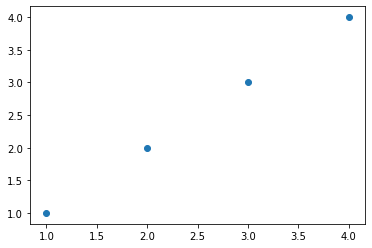

In [24]:
plt.scatter([1,2,3,4], [1,2,3,4])